In [95]:
#Importing libraries
import pandas as pd
import numpy as np
import glob
import os

import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [96]:
data = pd.read_csv("sensory data/00EABED2-271D-49D8-B599-1D4A09240601.features_labels.csv.gz")

In [97]:
data.head()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_energy_b

In [98]:
print(data.columns)
print(len(data.columns))
# Column 1: timestamp
# Columns 2 to 226: features
# Columns 227 to 277: ground truth labels
# Column 278: label_source
# 10 sensors and 26/27 features for first sensor

Index(['timestamp', 'raw_acc:magnitude_stats:mean',
       'raw_acc:magnitude_stats:std', 'raw_acc:magnitude_stats:moment3',
       'raw_acc:magnitude_stats:moment4',
       'raw_acc:magnitude_stats:percentile25',
       'raw_acc:magnitude_stats:percentile50',
       'raw_acc:magnitude_stats:percentile75',
       'raw_acc:magnitude_stats:value_entropy',
       'raw_acc:magnitude_stats:time_entropy',
       ...
       'label:STAIRS_-_GOING_DOWN', 'label:ELEVATOR', 'label:OR_standing',
       'label:AT_SCHOOL', 'label:PHONE_IN_HAND', 'label:PHONE_IN_BAG',
       'label:PHONE_ON_TABLE', 'label:WITH_CO-WORKERS', 'label:WITH_FRIENDS',
       'label_source'],
      dtype='object', length=278)
278


In [99]:
len(data)

2287

In [104]:
# Read all 60 users' files with a new first column that has the user's UUID and concat them

files = glob.glob("sensory data\*.csv.gz")
uuids = []
for filename in files:
    uuids.append(filename.strip("sensory data\\").strip(".features_labels.csv.gz"))
ids = list(range(1, 61))
# print(ids)
# print(files)
# print(uuids)
# print(len(files))
dfs = []
for i in range(len(files)):
    df = pd.read_csv(files[i])
    new_col = [uuids[i]] * len(df)
    new_id_col = [ids[i]] * len(df) 
    df.insert(loc=0, column="uuid", value=new_col)
    df.insert(loc=1, column="id", value=new_id_col)
    dfs.append(df)

salesdata = pd.concat(dfs,ignore_index=True)
salesdata

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]


,uuid,id,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_

# Features

In [112]:
#Extracting features and timestamp

features = salesdata.iloc[:, 0:228]
print(features.columns[3:29])

Index(['raw_acc:magnitude_stats:mean', 'raw_acc:magnitude_stats:std',
       'raw_acc:magnitude_stats:moment3', 'raw_acc:magnitude_stats:moment4',
       'raw_acc:magnitude_stats:percentile25',
       'raw_acc:magnitude_stats:percentile50',
       'raw_acc:magnitude_stats:percentile75',
       'raw_acc:magnitude_stats:value_entropy',
       'raw_acc:magnitude_stats:time_entropy',
       'raw_acc:magnitude_spectrum:log_energy_band0',
       'raw_acc:magnitude_spectrum:log_energy_band1',
       'raw_acc:magnitude_spectrum:log_energy_band2',
       'raw_acc:magnitude_spectrum:log_energy_band3',
       'raw_acc:magnitude_spectrum:log_energy_band4',
       'raw_acc:magnitude_spectrum:spectral_entropy',
       'raw_acc:magnitude_autocorrelation:period',
       'raw_acc:magnitude_autocorrelation:normalized_ac', 'raw_acc:3d:mean_x',
       'raw_acc:3d:mean_y', 'raw_acc:3d:mean_z', 'raw_acc:3d:std_x',
       'raw_acc:3d:std_y', 'raw_acc:3d:std_z', 'raw_acc:3d:ro_xy',
       'raw_acc:3d:ro_xz', 

In [113]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377346 entries, 0 to 377345
Columns: 228 entries, uuid to discrete:time_of_day:between21and3
dtypes: float64(225), int64(2), object(1)
memory usage: 656.4+ MB


In [114]:
features.describe()

,id,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_energ

In [115]:
#Taking it sensor by sensor

# Accelerometer

In [116]:
#Extracting the mean calculations every 60 secs for each sensor
raw_acc_cols = ["uuid", "timestamp", "id"]
for col in salesdata.columns:
    if col.startswith("raw_acc"):
        raw_acc_cols.append(col)
raw_acc_cols

['uuid',
 'timestamp',
 'id',
 'raw_acc:magnitude_stats:mean',
 'raw_acc:magnitude_stats:std',
 'raw_acc:magnitude_stats:moment3',
 'raw_acc:magnitude_stats:moment4',
 'raw_acc:magnitude_stats:percentile25',
 'raw_acc:magnitude_stats:percentile50',
 'raw_acc:magnitude_stats:percentile75',
 'raw_acc:magnitude_stats:value_entropy',
 'raw_acc:magnitude_stats:time_entropy',
 'raw_acc:magnitude_spectrum:log_energy_band0',
 'raw_acc:magnitude_spectrum:log_energy_band1',
 'raw_acc:magnitude_spectrum:log_energy_band2',
 'raw_acc:magnitude_spectrum:log_energy_band3',
 'raw_acc:magnitude_spectrum:log_energy_band4',
 'raw_acc:magnitude_spectrum:spectral_entropy',
 'raw_acc:magnitude_autocorrelation:period',
 'raw_acc:magnitude_autocorrelation:normalized_ac',
 'raw_acc:3d:mean_x',
 'raw_acc:3d:mean_y',
 'raw_acc:3d:mean_z',
 'raw_acc:3d:std_x',
 'raw_acc:3d:std_y',
 'raw_acc:3d:std_z',
 'raw_acc:3d:ro_xy',
 'raw_acc:3d:ro_xz',
 'raw_acc:3d:ro_yz']

In [117]:
raw_acc = salesdata[raw_acc_cols]
raw_acc

,uuid,timestamp,id,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz
0,00EABED2-271D-49D8-B599-1D4A09240601,1444079161,1,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,5.043970,0.000042,0.000364,0.000761,0.005429,0.429853,0.173685,0.148988,0.002331,0.004614,-0.996790,0.003269,0.003521,0.003539,0.106920,0.516842,0.255494
1,00EABED2-271D-49D8-B599-1D4A09240601,1444079221,1,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,5.043367,0.000071,0.000468,0.000630,0.007756,0.429733,0.057819,0.207046,0.003557,0.005495,-0.996832,0.002489,0.003772,0.004177,-0.079483,0.357748,0.036252
2,00EABED2-271D-49D8-B599-1D4A09240601,1444079281,1,0.996825,0.003667,0.003094,0.006076,0.994797,0.996614,0.998704,2.031780,6.684605,5.043599,0.000052,0.000251,0.000730,0.008223,0.429799,0.173440,0.186961,0.004180,0.005776,-0.996785,0.003567,0.004051,0.003681,0.122432,0.464881,0.222375
3,00EABED2-271D-49D8-B599-1D4A09240601,1444079341,1,0.996874,0.003541,0.000626,0.006059,0.995050,0.996907,0.998690,1.865318,6.684605,5.043263,0.000019,0.000173,0.000623,0.003763,0.429628,0.173474,0.479430,0.004179,0.005551,-0.996836,0.004202,0.002919,0.003559,0.308841,0.773514,0.296194
4,00EABED2-271D-49D8-B599-1D4A09240601,1444079431,1,0.997371,0.037653,0.043389,0.102332,0.995548,0.996860,0.998205,0.460806,6.683904,5.042779,0.000858,0.006035,0.014974,0.023291,0.430164,0.260603,0.202305,-0.008383,-0.000009,-0.994184,0.074612,0.023784,0.039512,-0.187758,-0.204381,0.062696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377341,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,1444234779,60,1.007886,0.009355,0.012618,0.030905,1.005121,1.008012,1.010024,0.423861,6.684569,5.044702,0.001069,0.003347,0.004135,0.031028,0.430614,8.585197,0.187399,-0.000134,-0.024238,-1.007488,0.010869,0.010082,0.009096,0.864661,0.277322,0.263789
377342,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,1444234839,60,1.000400,0.009068,-0.019631,0.032762,0.998186,1.001128,1.003113,0.768680,6.684569,5.043723,0.000379,0.001709,0.001969,0.007478,0.429872,1.036262,0.292309,0.000613,-0.021063,-1.000003,0.011969,0.014464,0.008956,-0.665900,0.014873,0.015536
377343,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,1444234899,60,1.026223,0.195112,0.255240,0.379733,0.983684,1.000173,1.030232,1.484173,6.668006,5.031912,1.109431,2.380978,1.761493,2.263843,0.688024,0.852263,0.223209,0.192250,0.723133,-0.199525,0.294796,0.438057,0.461207,-0.219706,0.350897,0.097009
377344,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,1444234959,60,1.123513,0.273450,0.312818,0.480787,0.966631,1.051232,1.229708,1.808524,6.656521,5.039056,1.906018,2.991313,1.275461,1.965808,0.755036,1.064535,0.274951,-0.308654,0.845493,-0.173434,0.459076,0.439645,0.304650,-0.260843,-0.208532,0.587430


In [118]:
raw_acc["raw_acc:magnitude_stats:mean"].describe()

count    377056.000000
mean          1.002223
std           0.079623
min           0.018148
25%           0.992556
50%           1.001258
75%           1.012745
max           3.185837
Name: raw_acc:magnitude_stats:mean, dtype: float64

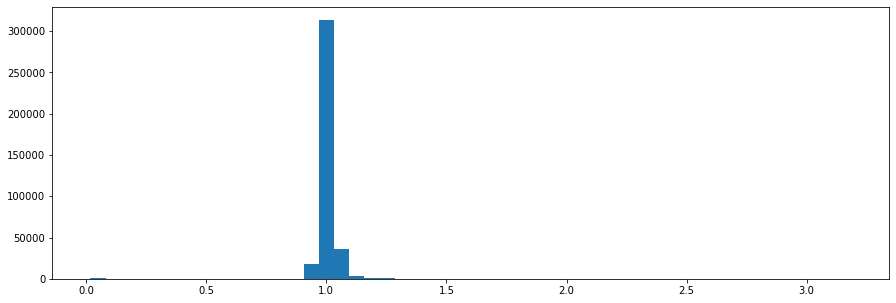

In [119]:
#Distribution of the accelerometer mean (in every 60 secs) values
plt.figure(figsize = (15, 5))
plt.hist(raw_acc["raw_acc:magnitude_stats:mean"], bins = 50) #Most values are around 1.0
plt.show()

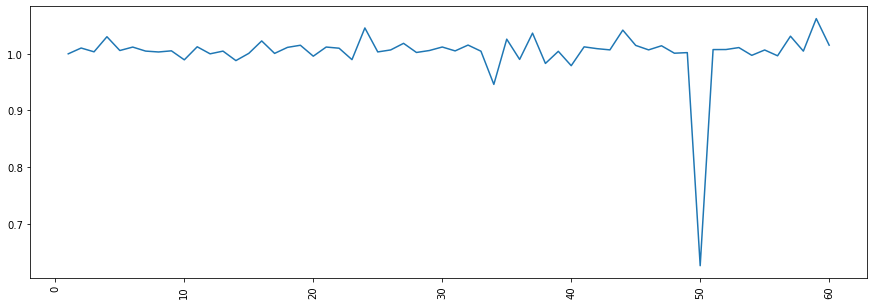

In [122]:
#Distribution based on user
raw_acc_by_user = raw_acc.groupby("id", as_index=False).mean()
plt.figure(figsize = (15, 5))
plt.plot(raw_acc_by_user["id"], raw_acc_by_user["raw_acc:magnitude_stats:mean"])
plt.xticks(rotation = 90)
plt.show()

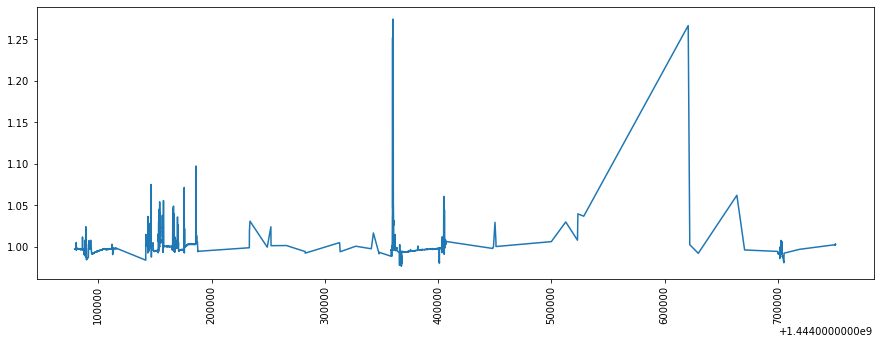

In [126]:
#Distribution over time for first user
raw_acc_user_2 = raw_acc[raw_acc["id"] == 1]
plt.figure(figsize = (15, 5))
plt.plot(raw_acc_user_2["timestamp"], raw_acc_user_2["raw_acc:magnitude_stats:mean"])
plt.xticks(rotation = 90)
plt.show()

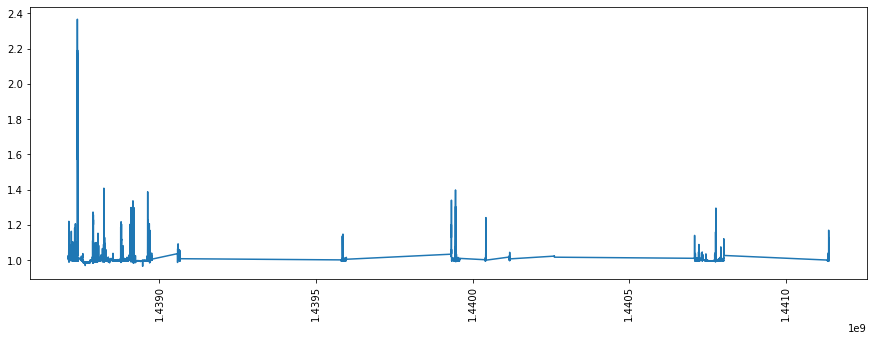

In [127]:
#Distribution over time for second user
raw_acc_user_1 = raw_acc[raw_acc["id"] == 2]
plt.figure(figsize = (15, 5))
plt.plot(raw_acc_user_1["timestamp"], raw_acc_user_1["raw_acc:magnitude_stats:mean"])
plt.xticks(rotation = 90)
plt.show()

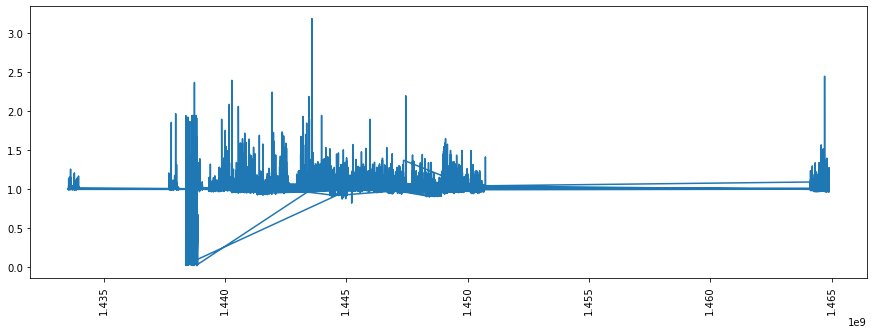

In [128]:
#Distribution over time for all users 
#does not make sense, since different time values for each user
plt.figure(figsize = (15, 5))
plt.plot(raw_acc["timestamp"], raw_acc["raw_acc:magnitude_stats:mean"])
plt.xticks(rotation = 90)
plt.show()

# Gyroscope

In [129]:
#Extracting the mean calculations every 60 secs for each sensor
proc_gyro_cols = ["uuid", "id", "timestamp"]
for col in salesdata.columns:
    if col.startswith("proc_gyro"):
        proc_gyro_cols.append(col)
proc_gyro_cols

['uuid',
 'id',
 'timestamp',
 'proc_gyro:magnitude_stats:mean',
 'proc_gyro:magnitude_stats:std',
 'proc_gyro:magnitude_stats:moment3',
 'proc_gyro:magnitude_stats:moment4',
 'proc_gyro:magnitude_stats:percentile25',
 'proc_gyro:magnitude_stats:percentile50',
 'proc_gyro:magnitude_stats:percentile75',
 'proc_gyro:magnitude_stats:value_entropy',
 'proc_gyro:magnitude_stats:time_entropy',
 'proc_gyro:magnitude_spectrum:log_energy_band0',
 'proc_gyro:magnitude_spectrum:log_energy_band1',
 'proc_gyro:magnitude_spectrum:log_energy_band2',
 'proc_gyro:magnitude_spectrum:log_energy_band3',
 'proc_gyro:magnitude_spectrum:log_energy_band4',
 'proc_gyro:magnitude_spectrum:spectral_entropy',
 'proc_gyro:magnitude_autocorrelation:period',
 'proc_gyro:magnitude_autocorrelation:normalized_ac',
 'proc_gyro:3d:mean_x',
 'proc_gyro:3d:mean_y',
 'proc_gyro:3d:mean_z',
 'proc_gyro:3d:std_x',
 'proc_gyro:3d:std_y',
 'proc_gyro:3d:std_z',
 'proc_gyro:3d:ro_xy',
 'proc_gyro:3d:ro_xz',
 'proc_gyro:3d:ro_yz'

In [130]:
proc_gyro = salesdata[proc_gyro_cols]
proc_gyro

,uuid,id,timestamp,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz
0,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079161,0.002558,0.001510,0.001832,0.002531,0.001526,0.002196,0.003230,2.236059,6.532865,5.149616,2.818909,3.757026,2.952941,4.312930,1.766920,4.193949,0.107787,0.000412,0.000448,-0.000541,0.001705,0.001987,0.001144,-0.372543,0.175125,-0.033004
1,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079221,0.002279,0.001256,0.001519,0.002183,0.001424,0.002035,0.002880,2.028993,6.550010,4.945471,2.153223,2.719359,3.117012,4.355961,1.455363,1.323078,0.140106,0.000091,-0.000082,0.000002,0.001576,0.001746,0.001105,-0.425875,0.138763,0.047049
2,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079281,0.002579,0.001790,0.002418,0.003395,0.001350,0.002088,0.003187,1.975138,6.492197,4.878255,3.366933,3.824890,3.056752,4.501969,1.848755,1.323074,0.160500,0.000011,0.000179,0.000026,0.001714,0.002244,0.001360,-0.506993,0.181114,-0.214371
3,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079341,0.002497,0.001577,0.001944,0.002715,0.001415,0.002106,0.003102,2.094385,6.513228,4.917277,3.325518,3.286417,2.773796,4.546137,1.726047,0.524236,0.091489,-0.000006,-0.000020,0.000042,0.001347,0.002357,0.001164,-0.565952,0.108946,-0.138670
4,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079431,0.105566,0.340573,0.582097,0.825209,0.001867,0.003018,0.006146,0.665061,4.638178,6.291532,3.912588,3.541116,4.298033,4.824680,3.425678,0.000000,0.000000,-0.001074,-0.000934,0.006930,0.099609,0.322466,0.114795,-0.318971,0.097856,-0.353731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377341,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234779,0.020239,0.131169,0.297011,0.458977,0.003924,0.005372,0.007116,0.151502,4.235067,4.579972,5.001542,5.603289,4.951970,5.334684,4.750381,6.178258,0.081873,-0.000377,0.000121,-0.009534,0.003632,0.003682,0.132276,-0.047839,0.065722,0.108646
377342,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234839,0.007604,0.005517,0.010335,0.016889,0.004601,0.006533,0.009371,1.252950,6.510129,5.201593,3.525524,3.616272,3.256231,4.196058,1.962062,4.428477,0.074647,0.000029,0.000529,-0.000764,0.005531,0.005856,0.004745,-0.248947,-0.056549,0.082608
377343,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234899,1.012825,1.446485,1.951552,2.592079,0.118451,0.422182,1.170368,1.549467,5.936993,5.786401,3.829856,3.862398,3.563287,3.896671,2.312802,0.000000,0.000000,0.018604,0.138204,-0.040052,0.898456,1.284445,0.800039,0.191768,-0.062184,-0.123859
377344,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234959,2.140000,1.581337,1.958200,2.738973,0.963640,1.717493,3.017175,2.176307,6.448411,5.401374,3.955306,4.443023,2.885685,3.208792,2.113920,2.651518,0.191987,0.036168,0.029044,0.133833,1.176626,1.676329,1.692819,-0.201934,0.434596,0.121177


In [131]:
proc_gyro["proc_gyro:magnitude_stats:mean"].describe()

count    359912.000000
mean          0.174108
std           0.477457
min           0.000705
25%           0.002914
50%           0.008987
75%           0.103023
max          34.906977
Name: proc_gyro:magnitude_stats:mean, dtype: float64

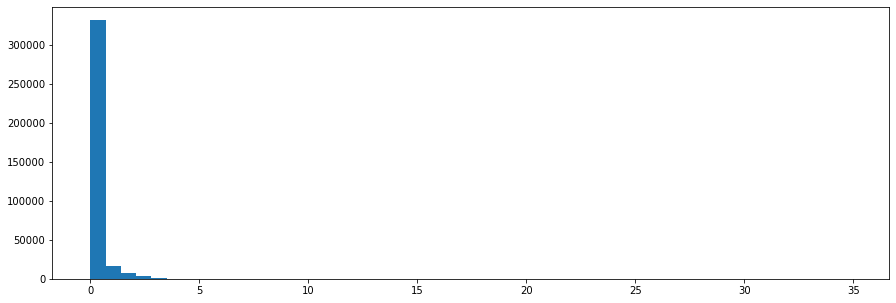

In [132]:
#Distribution of the gyroscope mean (in every 60 secs) values
plt.figure(figsize = (15, 5))
plt.hist(proc_gyro["proc_gyro:magnitude_stats:mean"], bins = 50) #Most values are around 0.1
plt.show()

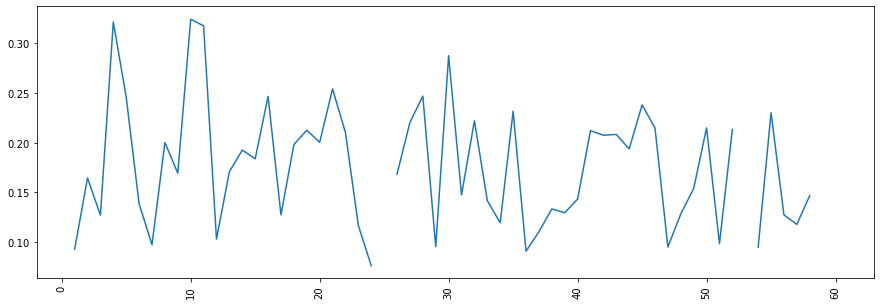

In [134]:
#Distribution based on user
proc_gyro_by_user = proc_gyro.groupby("id", as_index=False).mean()
plt.figure(figsize = (15, 5))
plt.plot(proc_gyro_by_user["id"], proc_gyro_by_user["proc_gyro:magnitude_stats:mean"])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#Do for rest of the features

# Labels

In [ ]:
#Extracting features and timestamp

features = salesdata.iloc[:, 0:228]
print(features.columns[3:29])